## Observations and Insights 

Markdown: 

Observations:
1- The four most effective treatments were Capomulin, Ramicane, Ketapril, and Naftisol based on length of survivability; with Capomuim and Ramicane as the most effective.

2-Capomuim and Ramicane had sigificantly lower tumor volumes at the end of the study. Infubinol and Ceftamin had significantly higher tumor volume.

3-Infubinol had interesting outliers in the tumor volume data. It is in line with the leading drug regimens. Worth further exploration.
    

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# PANDAS.PYDATA.ORG -> pd.merge(left, right, on="B", how="outer", validate="one_to_many")
mousecomplete_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer", validate="one_to_many")
# Display the data table for preview
print(mousecomplete_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [2]:
# Checking the number of mice.
mousecomplete_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Checking the number of mice.
mousecomplete_df["Mouse ID"].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mousetrap_array=mousecomplete_df.loc[mousecomplete_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
mousetrap_array

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# https://towardsdatascience.com/selecting-rows-with-loc-276d217c4ea5
# df_new = df_old.loc[df_old['Column Name'] == 'some_value' ]
gary_df = mousecomplete_df.loc[mousecomplete_df["Mouse ID"]=="g989"]

print (gary_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
mousehouse_df = mousecomplete_df[mousecomplete_df['Mouse ID'].isin(mousetrap_array)==False]
mousehouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mousehouse_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mousehouse_df.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mousehouse_df.groupby(["Drug Regimen","Tumor Volume (mm3)"]).describe()
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = mousehouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mousehouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = mousehouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = mousehouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = mousehouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
 
# Assemble the resulting series into a single summary dataframe.
mousehousesum_df =pd.DataFrame ({"mean": mean,"median": median,"var":var, "std": std, "sem": SEM})
mousehousesum_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
median = mousehouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = mousehouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = mousehouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = mousehouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Using the aggregation method, produce the same summary statistics in a single line
mousehousesum_df= mousehouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
mousehousesum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
mousedrugtumor_df=mousehouse_df[["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]]
mousedrugtumor_df.head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,k403,0,Ramicane,45.000000
1,k403,5,Ramicane,38.825898
2,k403,10,Ramicane,35.014271
3,k403,15,Ramicane,34.223992
4,k403,20,Ramicane,32.997729


<AxesSubplot:>

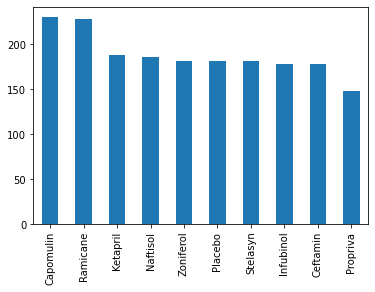

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugreg= mousehouse_df["Drug Regimen"].value_counts()
y_axis = mousehouse_df["Timepoint"]
# label y axis to total # of mice
drugreg.plot(kind="bar")

<Figure size 720x504 with 0 Axes>

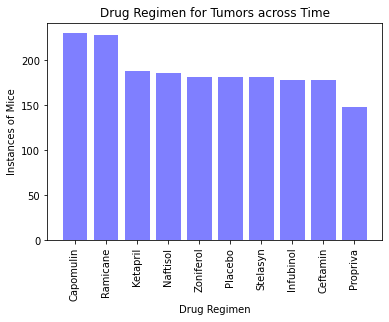

<Figure size 720x504 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugreg= mousehouse_df["Drug Regimen"].value_counts()
y_axis = mousehouse_df["Timepoint"]
pd.DataFrame(mousehouse_df)
# ({"Drug Regimen", "Timepoint"})
plt.bar(drugreg.index.values,drugreg.values, color='b', alpha=0.5, align="center")
plt.title("Drug Regimen for Tumors across Time")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Instances of Mice")
plt.figure(figsize=(10,7))


In [15]:
gender = mousehouse_df.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()
gender

Male      125
Female    123
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd4b037cfd0>,
 [Text(-0.6963355017006471, -0.8515379434125696, 'Male Mice'),
  Text(0.6963355017006471, 0.8515379434125695, 'Female Mice')],
 [Text(-0.37981936456398924, -0.46447524186140154, '50.4%'),
  Text(0.37981936456398924, 0.46447524186140143, '49.6%')])

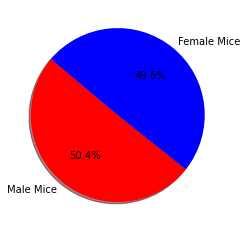

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Labels for the sections of our pie chart
labels = ["Male Mice", "Female Mice"]

# The values of each section of the pie chart
sizes = [125, 123]

# # The colors of each section of the pie chart
colors = ["red", "blue"]
plt.pie(gender, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

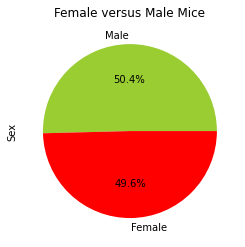

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender.plot.pie(y='Sex',autopct="%1.1f%%",title = "female versus male mice", legend=False, colors = ["yellowgreen", "red"])
plt.title("Female versus Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_tumor_df = mousehouse_df.groupby(["Mouse ID"]).max()
max_tumor_df = max_tumor_df.reset_index()
capomulin = mousehouse_df.loc[mousehouse_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = mousehouse_df.loc[mousehouse_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = mousehouse_df.loc[mousehouse_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = mousehouse_df.loc[mousehouse_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mousehousemax_df = max_tumor_df[['Mouse ID','Timepoint']].merge(mousehouse_df,on=['Mouse ID','Timepoint'],how="left")
# Start by getting the last (greatest) timepoint for each mouse
print(mousehousemax_df)

    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2  

In [23]:
# Quantitatively determine capomulin outliers
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")

capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)].to_frame()

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


,Tumor Volume (mm3)


In [24]:
# Quantitatively determine ramicane outliers
ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-cap_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"ramicane potential outliers: {ramicane.loc[(ramicane < cap_lower_bound) | (ramicane > cap_upper_bound)]}")

ramicane.loc[(ramicane < cap_lower_bound) | (ramicane > cap_upper_bound)].to_frame()


ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


,Tumor Volume (mm3)


In [25]:
# Quantitatively determine infubinol outliers
inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < inf_lower_bound) | (infubinol > inf_upper_bound)]}")

infubinol.loc[(infubinol < cap_lower_bound) | (infubinol > inf_upper_bound)].to_frame()

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


,Tumor Volume (mm3)


In [27]:
# Quantitatively determine ceftamin outliers
cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)]}")

ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)].to_frame()

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


,Tumor Volume (mm3)


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
# Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = mousehouse_df.loc[mousehouse_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
# add subset 
    tumor_vol_list.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug}'s potential outliers: {final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]}")
    print()
    
# Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



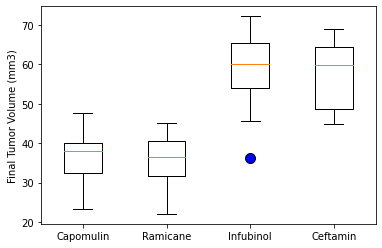

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outliers = dict(markerfacecolor='blue',markersize=10)
plt.boxplot(tumor_vol_list,labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=outliers)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

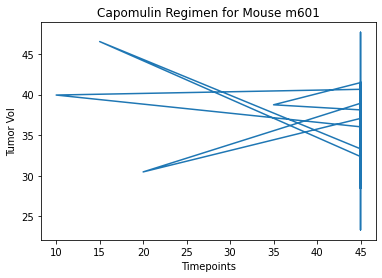

In [71]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capmousehouse_df=mousehouse_df.loc[mousehouse_df["Drug Regimen"]=="Capomulin"]
onemouse = capmousehouse_df.loc[capmousehouse_df["Mouse ID"]=="m601"]
# Plot out rooms versus median house price
x_values = capmousehouse_df["Timepoint"]
y_values = capmousehouse_df["Tumor Volume (mm3)"]
plt.plot(x_values,y_values)
plt.xlabel("Timepoints")
plt.ylabel("Tumor Vol")
plt.title("Capomulin Regimen for Mouse m601")
plt.show()

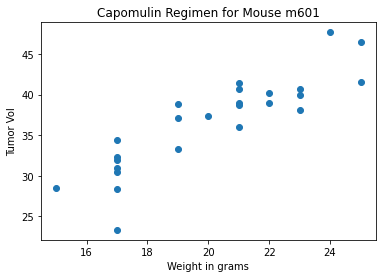

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capmousehouse_df=mousehouse_df.loc[mousehouse_df["Drug Regimen"]=="Capomulin"]
onemouse = capmousehouse_df.loc[capmousehouse_df["Mouse ID"]=="m601"]
# Plot out rooms versus median house price
x_values = capmousehouse_df["Weight (g)"]
y_values = capmousehouse_df["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.xlabel("Weight in grams")
plt.ylabel("Tumor Vol")
plt.title("Capomulin Regimen for Mouse m601")
plt.show()

## Correlation and Regression

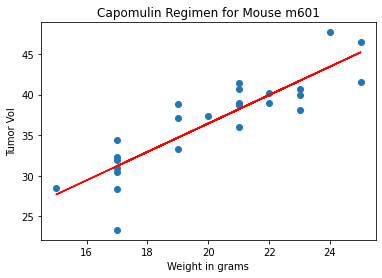

In [80]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capmousehouse_df["Weight (g)"]
y_values = capmousehouse_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values = x_values*slope +intercept
line_eq ="y=" +str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8,0.8), fontsize=15, color ="red")
plt.xlabel("Weight in grams")
plt.ylabel("Tumor Vol")
plt.title("Capomulin Regimen for Mouse m601")
plt.show()